In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Factor models


Let $r^{e,i}$ be an asset excess return over the risk-free rate

Let $f^e$ be a traded factor, for now  the excess returns on SPY ETF

Then we can write

$$r^{e,i}=\alpha_i + b_{i,f}f^e+u_{i}$$

where $b_{i,f}$ is asset $i$ exposure to the factor $f$

We can always write things that way--it is just a statistical decomposition

1. It can be useful for measuring risk if
    - The risk $u_{i,t}$ is specific to asset $i$ and uncorrelated with other assets
    - I.e the factors picks up lots of the variation in stock returns 

2. It can be useful for measuring expected returns if
    - The premium on the factor f, $E[f^e]$ summarize well the known "priced" systematic risk factors
    - By "priced" we mean risk-factors that earn a risk premium  $E[f^e]>0$

We will call the first a factor model of risk, and the second a factor model of expected returns

## Alpha and Beta

Note that

$$E[r^i]=E[rf+r^{e,i}]=rf+E[\alpha_i + b_{i,f}f^e+u_{i}]$$

$$E[r^i]=rf+\alpha_i+b_{i,f}E[f^e]+E[u_{i}]$$

- Using that $E[u_{i}]=0$ we have
- 
$$E[r^i]=rf+\alpha_i+b_{i,f}E[f^e]$$

- Thus, just like the risk of our asset could be attributed to the factor and it's component, the same model also allow us to decompose the expected return in terms of the risk-free rate, the premium coming from the common factor exposure $b_{i,f}E[f^e]$ and the risk-premium specific to the asset, the ALPHA.

- Getting exposure to the factor is a commodity. Anyone can buy SPY or many other funds that track the market very well
  
- A hedge fund, an active mutual fund, a trader in a prop desk will invest in assets claiming to have alpha

- The alpha does not need to be in a specific asset, can be o a combination of them

- The decomposition works the same for portfolio of assets



## How do we know these things?

even here with only one asset and one factor we already have to know many things

1. The risk-free rate
2. The beta 
3. The factor risk-premia
4. The factor variance
5. The asset specific alpha
6. The factor specific variance
 
- Some of those we observe directly in financial markets like the risk-free rate
- Others we can estimate well with relative short amount of data like beta, factor variances and idiossyncratic variance
- Factor risk-premia is harder, but for factors like the market we have long samples and we by an large use the average of these long historical samples to inform out views
  - And this is largely not the job of most quant investors. This macro view of the risk-premia in broad risk-factors is eitehr assumed to be a constant based on long samples, or  decided at the very top of the firm by a combination of leadership judgement, macro-analysis, and sometimes some forecasting.
  - but we will discuss this later in much detail. 
-  Alpha is exponentially harder!
  

## How do you find alpha?

- Every one in the business in searching for alpha
- So true alpha is
  - hard to find
  - disappears quickly
  - if the data was clear, people would already jumped at it
  - Once too much capital is in the trade we say that the trade is "crowded"
  - A Crowded trade can yield NEGATIVE alpha, even if the original idea was right!
  - You have to be right, but also early. 
  - If the trade gets crowded after you already in, it is good, you get the price moving in your direction and you close your position





### Estimating Alpha is hard!

Example with a few stocks. 

show beta well estimate. look at standard errors what ranges of beta are resonable given data

show alpha and standard errors

Then look at over time, say by year and show how all over the place it is. 

Can do time series and scatter plot of year on lagged year

## If not estimation then what?

- Valuation. You understand a business/market and think the market is not seeing what you are seeing. IT can be short-term insight, like a big client will cancel their services, or long-term prospects for the company business. 
  - Warren Buffet whole stick is about this. Read his letters to share-holders. It is all about finding good firms at good value
  - David Einhorn is another example. He famously betted against Leahman Brothers. 
  - Often this view will be formed by not only looking at balance sheets , but interacting with company insiders. Even though interactions are public, access allow a good fundamental analyst to see things more clearly (if you get private information, it is of course "earier" but it is illegal and you might end up in jail!)
  - Edge here is having good business judgment. You need to be confident that you are seeing something different form the market and you are right!
  
- Liquidity provision 
  - When firms are downgraded some fund are forced to sell, this often creates reversals
  - Similar effect happens when a firm is dropped from an index, say SP500
  - And it happens in reversal when it is added to the index
  - When mutual fund suffers outflows, they often have to sell, this often creates reversals
  
- Data that other people don't have.
  - Famous example are satellite pictures of parking lots of retail stores
  - Flow information of who is buying/selling what. Citadel securities for example.
  - flooding data, exposure to temperature, 
  - supplier data
  - See below a diagram by JP Morgan illustrating the variety of data sources



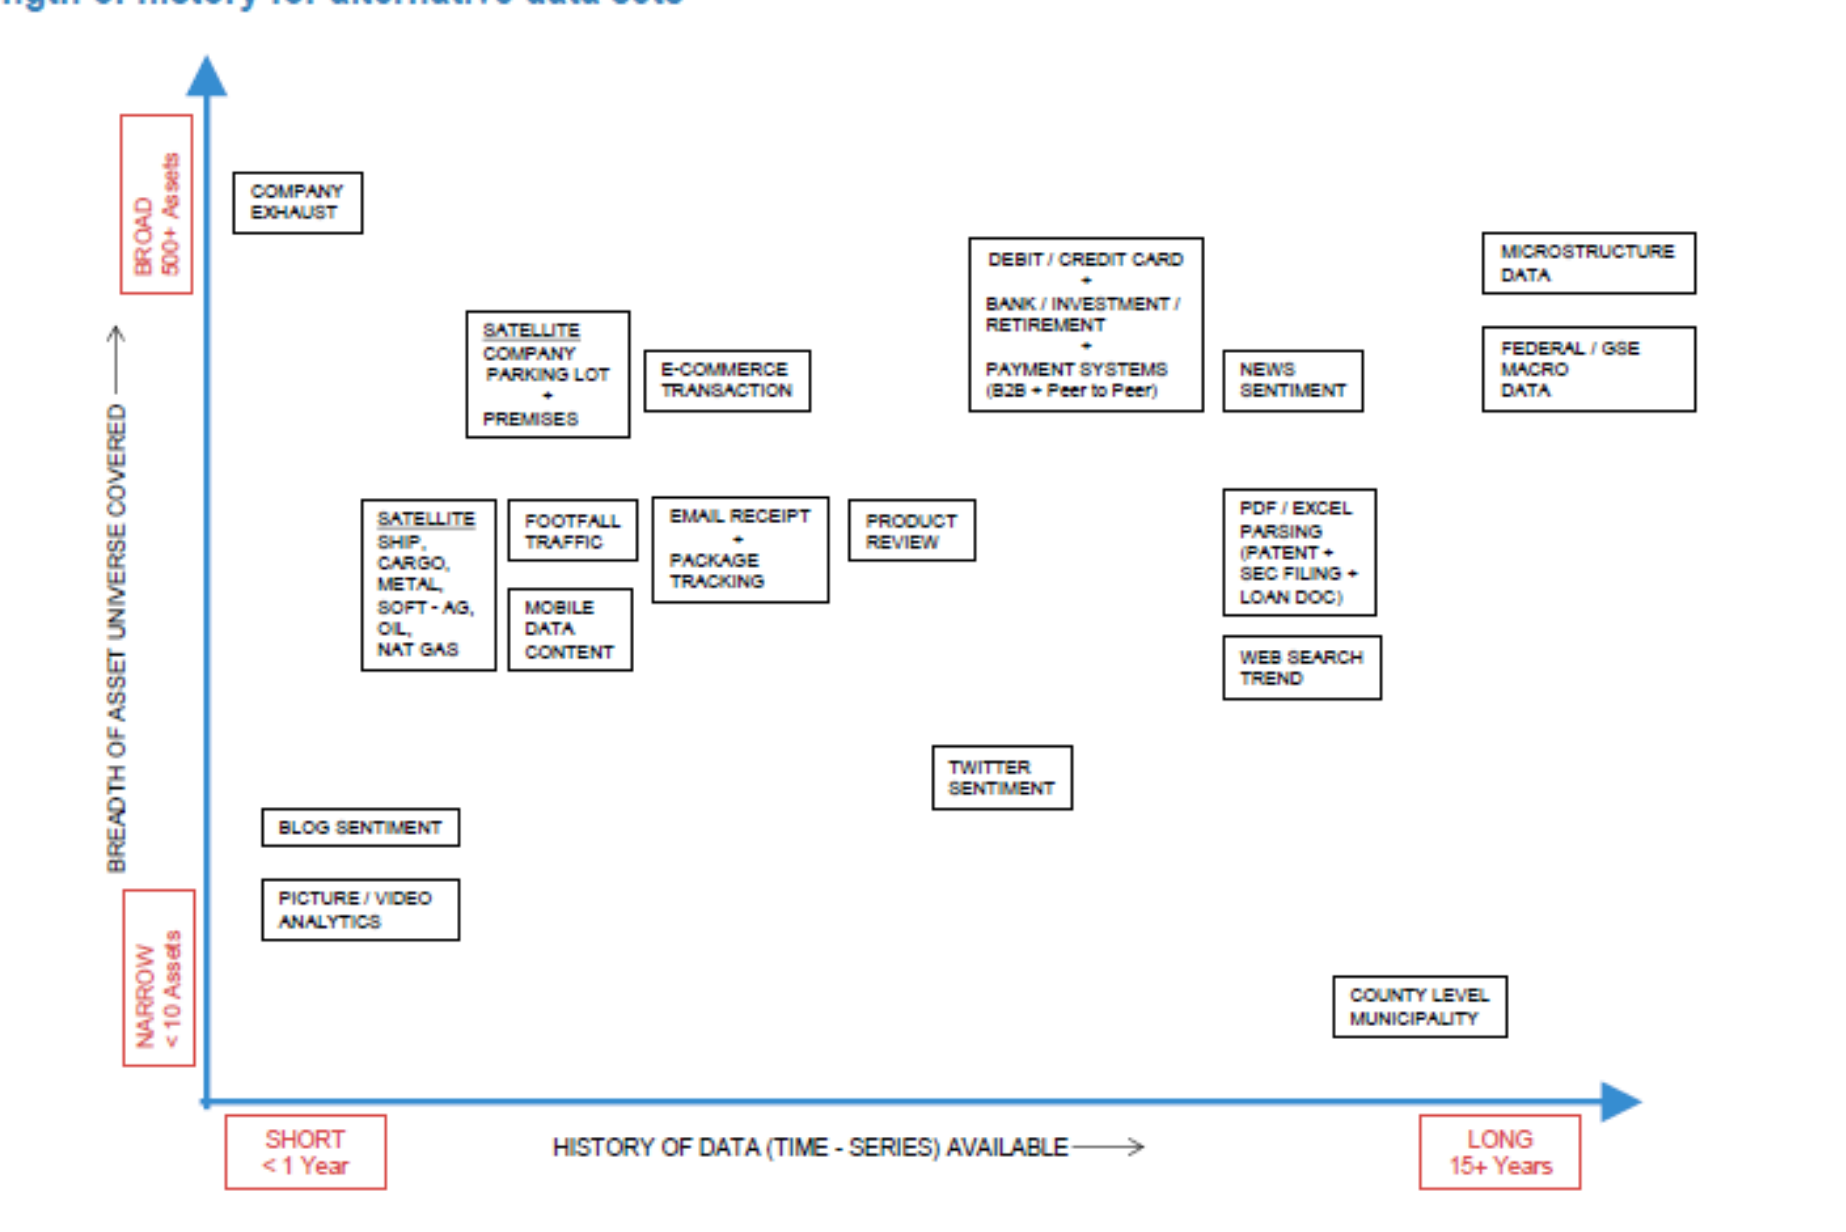

## Estimation of risk-premia

look at market risk-premia, mean , standard errors, sub samples

discuss how to think about reasonable sample sizes given the volatilities 



## Focus on your edge, hedge all the rest

The key use of the factor model is to give you discipline to separate your edge from the rest

We can use data to estimate betas well, so we can cleanly clean our our strategy from the factor effect

if you have an asset that has alpha, says, you are confident that APPLE will beat expectations and you expect a 5% appreciation in the next 12 months beyond any factor exposure that APPle might had, what do you do?

1. Buy apple! 

But what is the market crashes? Why bear that risk?  
Portfolio allocators look for managers with alpha, not beta. 
What if the market crashes before apple surprises and your investors pull out?


2. Hedge the market
   - How do you do that?
   - Short it!
   - How much?
   - the asset beta!


Example:

1. You buy 1M in Apple stock, so your portfolio PnL is 1M*$r^{apple}$
2. Your portfolio PnL in excess what you would earn in treasuries is 1M*$(r^{apple}-rf)$
3. Sell (short) 1M*$beta_{apple,f}$ of the factor
4. Now your portfolio is PnL above the risk-free rate is

$$1M*(r^{apple}-rf-\beta*r^{SPY}+\beta*rf)$$

When you sell SPY short you get the money and here I am "investing" it in the risk-free rate

Alternatively you can think of it as using to fund the apple buy

it does not matter, because we are accounting for the time-value of money

We certainly don't want to invest anything else to just add noise to our trade 


$$1M*(r^{apple}-\beta*r^{SPY}-(1-\beta)*rf)$$

For a high beta stock your trade generates extra cash!

If $\beta>1$, -(1-\beta)*rf>0

This happens because you are selling more than you are buying

If we substitute our factor model in our trade PnL and take expectations what do we get?

$$1M*E[r^{apple}-rf-\beta*r^{SPY}+\beta*rf)]$$

$$1M*E[\alpha_i+rf+beta*(r^{SPY}-rf)+u_i-rf-\beta*r^{SPY}+\beta*rf)]$$

A pure play portfolio!

$$1M*E[\alpha_i]$$

And what is the portfolio risk?

$$std(1M*(r^{apple}-rf-\beta*r^{SPY}+\beta*rf))=1M*std(u_i)$$

Lets do this!


What is the probability that your portfolio will be worth less that 750K in the end of the year if you don't hedge?

What is the probability of this same loss if you hedge?

Suppose you have access to funding at rf, how much larger a position can you take with the hedge while keeping the same probability of loss of 250K?